<font color="blue" size=5>**Training a Perceptron algorithm model using scikit-learn**</font>

1.**Importing required libararies and modules**

In [ ]:
from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score # metrics module provides different metrcis to measure the model's performance
 #(one of them is accuracy_score)

<font size=4>Now, we will visualize the datasets into a table format using <font color="blue">**pandas**</font></font>

In [ ]:
iris = datasets.load_iris() #loading Iris flowers datasets

# Create a DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add target and target_names columns
iris_df['target'] = iris.target
iris_df['target_names'] = [iris.target_names[i] for i in iris.target]
iris_df.head() # visualizing the first few datas only


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


<font size=4>We will select only two features <font color="blue">**"petal length"**</font> and <font color="blue">**"petal width"**</font> for the simplicity purpose. </font>

In [ ]:
X = iris.data[:,[2,3]] # all rows and selecting only third and fourth column
y = iris.target

<font size=4>Plotting a<font color="blue"> **scatter graph**</font> for each of the different class of IRIS-flower using **Matplotlib**. </font>

['setosa' 'versicolor' 'virginica']


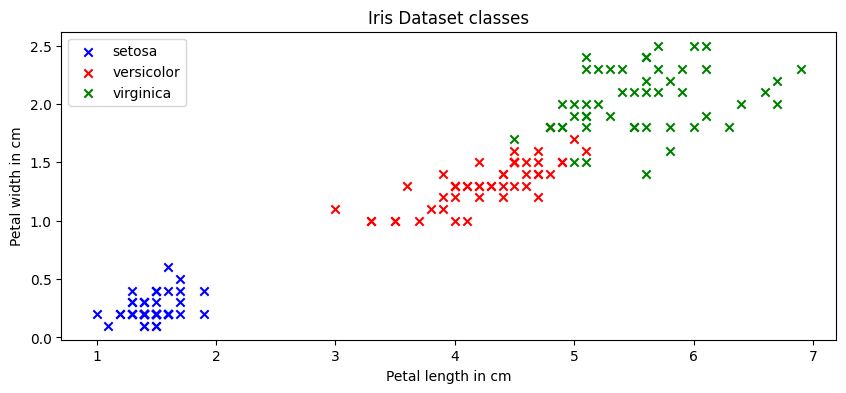

In [ ]:
target_names = iris.target_names
print(target_names)
length_setosa = iris_df.loc[iris_df["target_names"]=='setosa',"petal length (cm)"].values
width_setosa = iris_df.loc[iris_df["target_names"]=='setosa',"petal width (cm)"].values
length_versicolor = iris_df.loc[iris_df["target_names"]=='versicolor',"petal length (cm)"].values
width_versicolor = iris_df.loc[iris_df["target_names"]=='versicolor',"petal width (cm)"].values
length_virginica = iris_df.loc[iris_df["target_names"]=='virginica',"petal length (cm)"].values
width_virginica = iris_df.loc[iris_df["target_names"]=='virginica',"petal width (cm)"].values

fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(10,4))
axis.scatter(length_setosa,width_setosa,color="blue",marker='x',label="setosa");
axis.scatter(length_versicolor,width_versicolor,color="red",marker='x',label="versicolor");
axis.scatter(length_virginica,width_virginica,color="green",marker='x',label="virginica");


axis.set_xlabel("Petal length in cm")
axis.set_ylabel("Petal width in cm")
axis.set_title("Iris Dataset classes")

axis.legend();



<font size=4>We will split our labeled datasets into <font color="blue">**training** </font> and <font color='blue'>**test** </font> data.</font>

In below code, test_size=0.3, means the total datasets is splitted into training set(70% of total data) and test set (30% of total data) and we have kept random_state = 1 for uniform randomness

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1,stratify=y) # When we use stratify=y
# in train_test_split, it ensures that the proportions of all classes in target variable y
# are same in both the training and testing datasets.

<font size=4> Feature scaling is one of the important task for the proper performance of an algorithm.Many machine learning algorithms are sensitive to the independent variables(input features).

Scikit-learn also provides the options for feature scaling which can be obtained by using <font color="blue">**StandardScaler** </font>from <font color="blue">**preprocessing**</font> module.</font>

StandardScaler is used for standard Z-score scaling. It scale the input features to mean 0 and standard deviation of 1.

**Reference**:-  [Standard Score](https://en.wikipedia.org/wiki/Standard_score) (wikipedia)


In [ ]:
sc = StandardScaler()
sc.fit(X) #this will compute the mean and standard deviation of our dataset
X_train_std = sc.transform(X_train) # transforming into standard scale using above computed values
X_test_std = sc.transform(X_test)

<font color='blue' size=3>Now, using the **Perpectron** from sklearn </font>

In [ ]:
ppn = Perceptron(eta0=0.1,random_state=1)
ppn.fit(X_train_std,y_train) #training the model using the training sets
y_pred = ppn.predict(X_test_std) #predicting the test set
print(f"Misclassified examples: {(y_test != y_pred).sum()}")

Misclassified examples: 5


**Checking the** <font color="blue"> **accuracy** </font> **score of the model**

In [ ]:
print(f"Accuracy: {(accuracy_score(y_test,y_pred))*100:.3f}%")

Accuracy: 88.889%
